## Import library

In [514]:
import numpy as np
import matplotlib.pyplot as plt
import math

## AIMD Tutorial

In [515]:
def AIMD_TEST(alpha1, alpha2, beta1, beta2):
    iterations = 100

    x1 = 2
    x2 = 9
    C = 12

    alpha = alpha2
    beta = beta2

    x1Vals = np.zeros(iterations)
    x2Vals = np.zeros(iterations)

    for i in range(iterations):
        # 2 users over a common switching link
        if (x1 + x2 <= C):
            # Additive increase phase
            # print('Additive Phase')

            alpha1 = alpha1 
            alpha2 = alpha 

            x1 = x1 + alpha1
            x2 = x2 + alpha2

        # if over capacity
        else:
           # print('Multiplicative Phase')
            
            beta1 = beta1
            beta2 = beta

            x1 = x1 * beta1
            x2 = x2 * beta2

        x1Vals[i] = x1
        x2Vals[i] = x2

    print("Final x1:", x1)
    print("Final x2:", x2)

    plt.figure(figsize = (8, 8))
    plt.plot(x1Vals, x2Vals, '-o', label = 'AIMD Iterates')
    plt.plot([C,0], [0,C], 'r')
    plt.plot([C + 2*alpha, 0], [0, C + 2*alpha], 'g', label = 'Full bandwidth utilization line')
    plt.plot([0, C], [0, C], 'y--', label = 'Fairness Line')
    plt.xlabel('User 1 Allocation')
    plt.ylabel('User 2 Allocation')
    plt.title('AIMD Algorithm Simulation')
    plt.grid(True)
    plt.legend()
    plt.show()

Try 1
- No exponential increment

Final x1: 4.999999910593033
Final x2: 5.0000001192092896


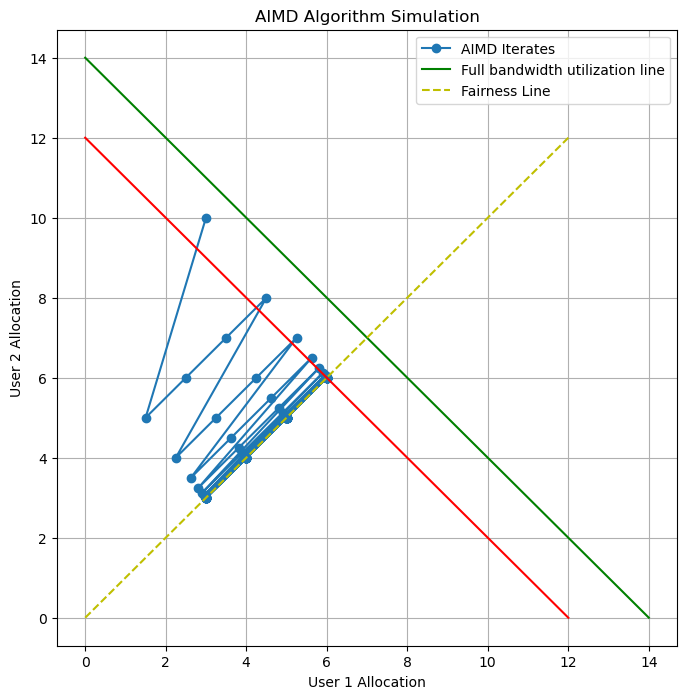

In [516]:
AIMD_TEST(1, 1, 0.5, 0.5)

Final x1: 4.666666618707598
Final x2: 4.666666744600151


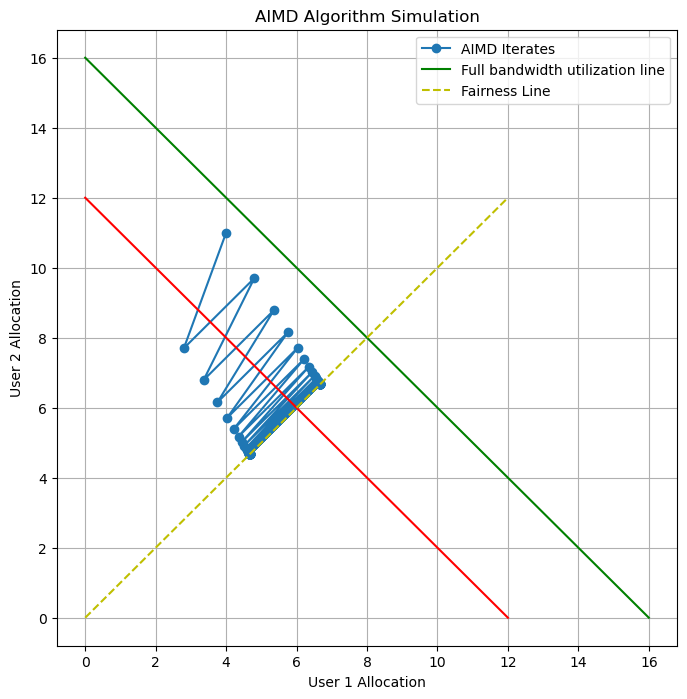

In [517]:
AIMD_TEST(2, 2, 0.7, 0.7)

## AIMD Tutorial (Exponential)

Final x1: 3.109818951938447
Final x2: 11.828724900851805


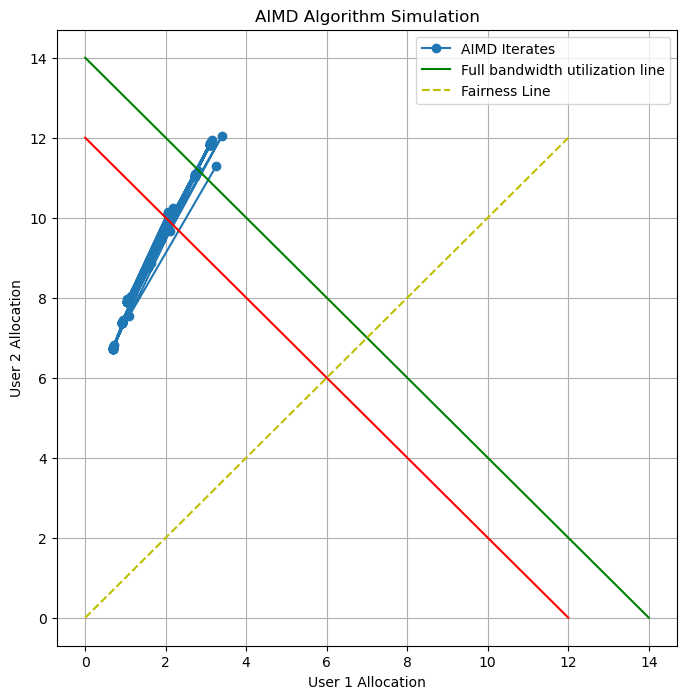

In [518]:
iterations = 100

x1 = 2
x2 = 9
C = 12

alpha = 1
beta = 0.5

exponent1 = 1/3
exponent2= 1-exponent1

x1Vals = np.zeros(iterations)
x2Vals = np.zeros(iterations)

for i in range(iterations):
    # 2 users over a common switching link
    if (x1 + x2 <= C):
        # Additive increase phase
        # print('Additive Phase')

        alpha1 = alpha * np.power(x1, exponent1) 
        alpha2 = alpha * np.log(x2 + 1)

        x1 = x1 + alpha1
        x2 = x2 + alpha2

    # if over capacity
    else:
    # print('Multiplicative Phase')
        
        beta1 = exponent1
        beta2 = exponent2

        x1 = x1 * beta1
        x2 = x2 * beta2

    x1Vals[i] = x1
    x2Vals[i] = x2

print("Final x1:", x1)
print("Final x2:", x2)

plt.figure(figsize = (8, 8))
plt.plot(x1Vals, x2Vals, '-o', label = 'AIMD Iterates')
plt.plot([C,0], [0,C], 'r')
plt.plot([C + 2*alpha, 0], [0, C + 2*alpha], 'g', label = 'Full bandwidth utilization line')
plt.plot([0, C], [0, C], 'y--', label = 'Fairness Line')
plt.xlabel('User 1 Allocation')
plt.ylabel('User 2 Allocation')
plt.title('AIMD Algorithm Simulation')
plt.grid(True)
plt.legend()
plt.show()

This graph has a trajectory that favours User 2 as compared to User 1

# AIMD Assignment
- Slow Start AIMD
- Varying alpha and beta params
- Different priorities for flow links
- Varying no. of flow links


Base Case
-  alpha 1
- beta 0.5

Final tcp: 2.9996337890625
Final aimd: 3.0003662109375
no. of times overhead: 13


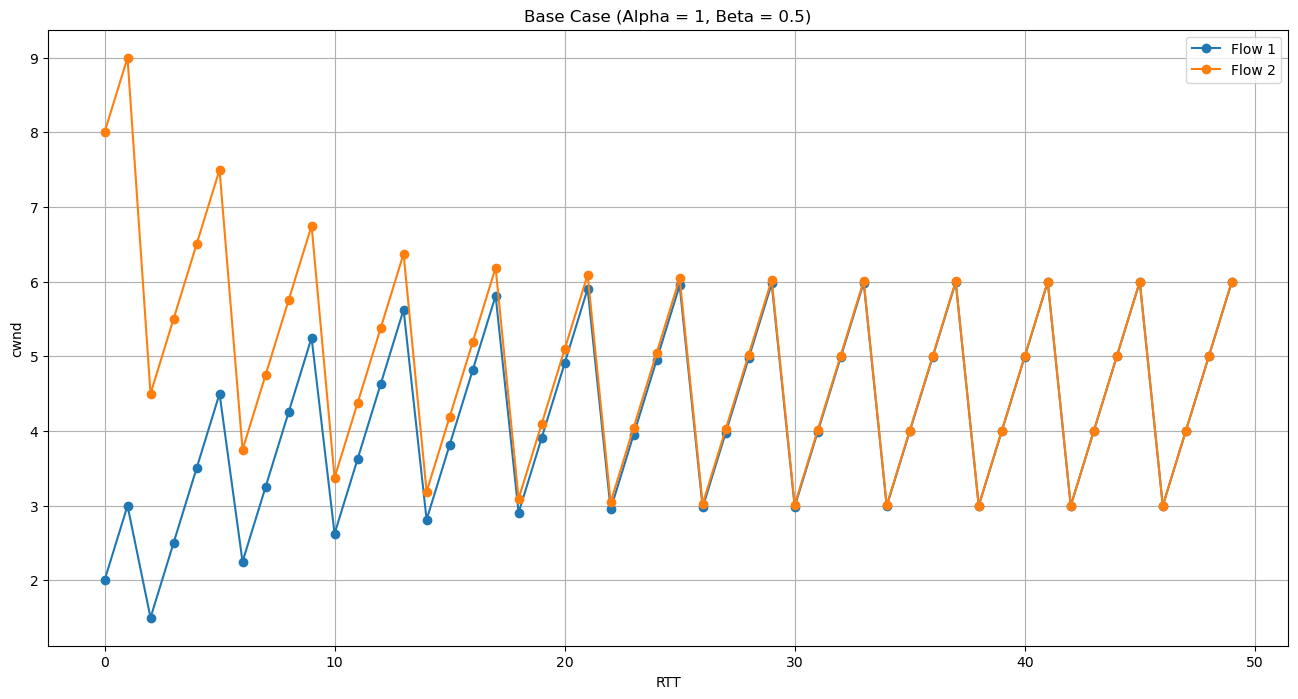

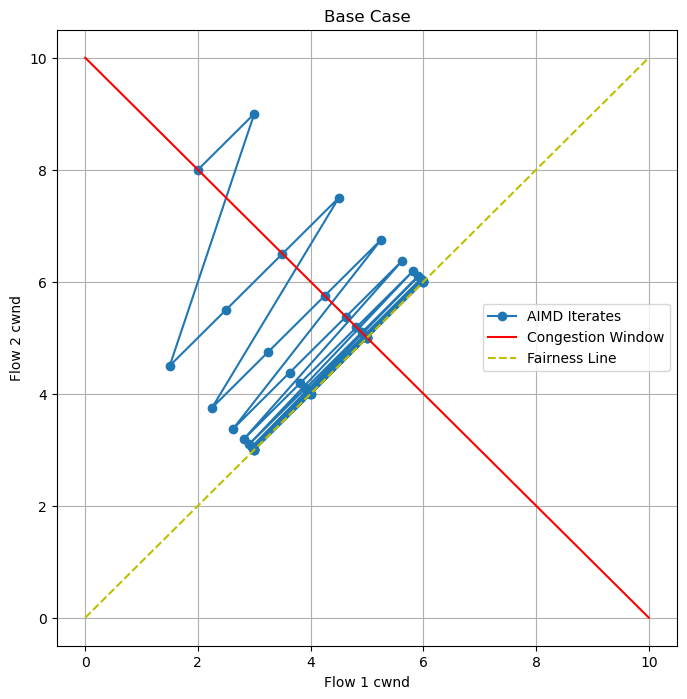

In [519]:
iterations = 50

aimd1 = 2
aimd2 = 8
capacity = 10

beta = 0.5
alpha = 1
count = 0

aimd1Vals, aimd2Vals = [], []

for i in range(iterations):
    aimd1Vals.append(aimd1)
    aimd2Vals.append(aimd2)
    #if congestion not detected
    if (aimd1 + aimd2 <= capacity):
        aimd1 = aimd1 + alpha
        aimd2 = aimd2 + alpha

    else:
        aimd1 = aimd1 * beta
        aimd2 = aimd2 * beta
        count += 1

print("Final tcp:", aimd1)
print("Final aimd:", aimd2)
print("no. of times overhead:", count)

plt.figure(figsize = (16, 8))
plt.plot(range(iterations), aimd1Vals, '-o', label = 'Flow 1')
plt.plot(range(iterations), aimd2Vals, '-o', label = 'Flow 2')

plt.xlabel('RTT')
plt.ylabel('cwnd')
plt.title('Base Case (Alpha = 1, Beta = 0.5)')
plt.grid(True)
plt.legend()
plt.show()

plt.figure(figsize = (8, 8))
plt.plot(aimd1Vals, aimd2Vals, '-o', label = 'AIMD Iterates')
plt.plot([capacity,0], [0,capacity], 'r', label ="Congestion Window")
plt.plot([0, capacity], [0, capacity], 'y--', label = 'Fairness Line')
plt.xlabel('Flow 1 cwnd')
plt.ylabel('Flow 2 cwnd')
plt.title('Base Case')
plt.grid(True)
plt.legend()
plt.show()

Final tcp: 14.999237060546875
Final aimd: 15.000732421875
no. of times overhead: 16


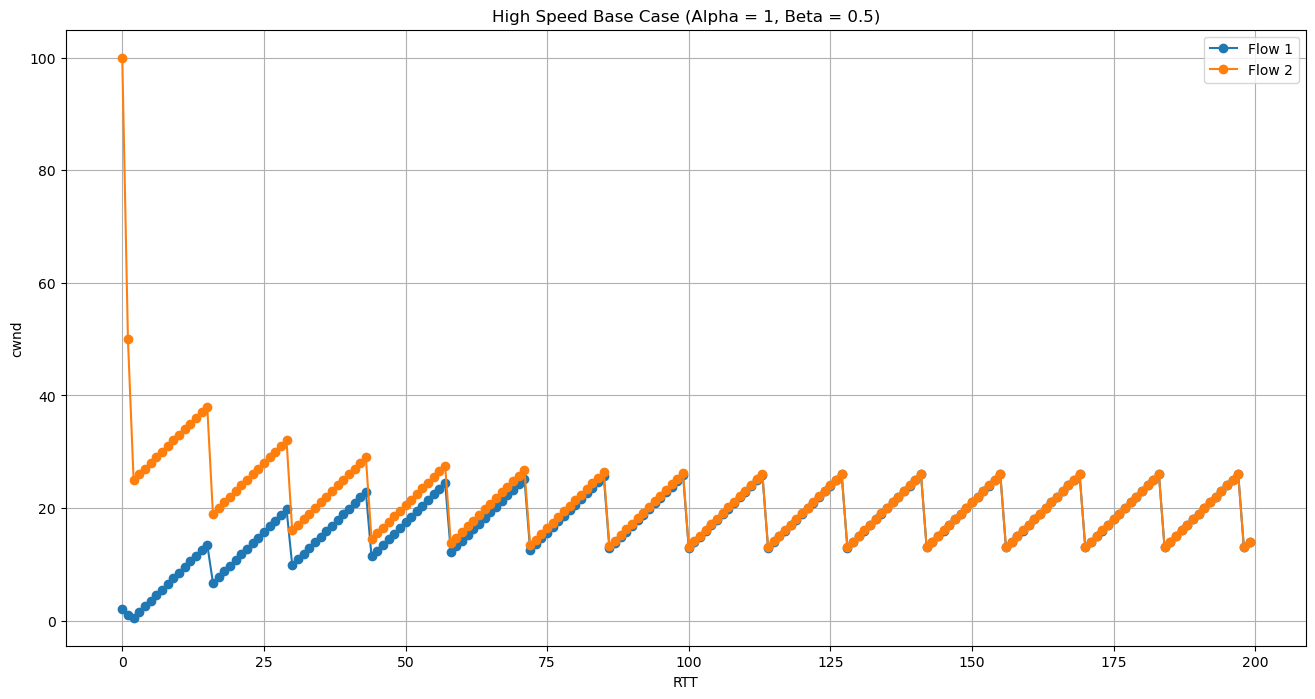

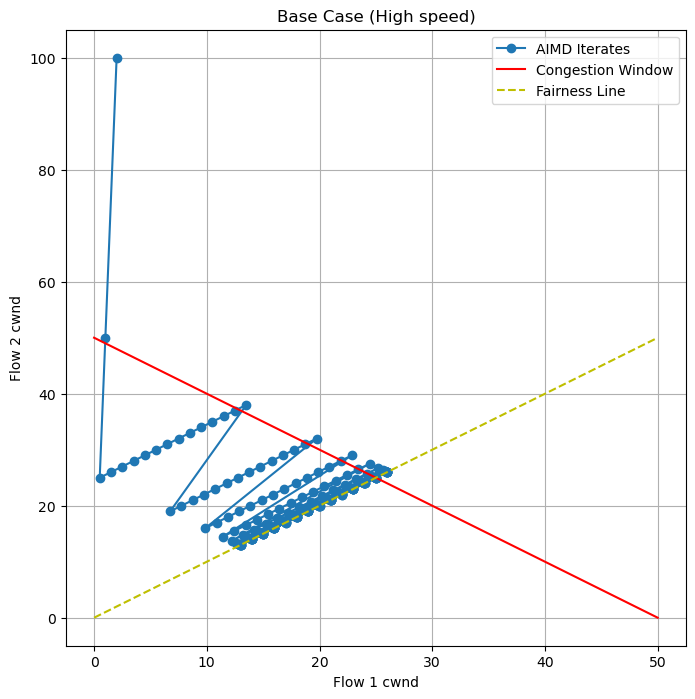

In [550]:
iterations = 200

aimd1 = 2
aimd2 = 100
capacity = 50

beta = 0.5
alpha = 1
count = 0

aimd1Vals, aimd2Vals = [], []

for i in range(iterations):
    aimd1Vals.append(aimd1)
    aimd2Vals.append(aimd2)
    #if congestion not detected
    if (aimd1 + aimd2 <= capacity):
        aimd1 = aimd1 + alpha
        aimd2 = aimd2 + alpha

    else:
        aimd1 = aimd1 * beta
        aimd2 = aimd2 * beta
        count += 1

print("Final tcp:", aimd1)
print("Final aimd:", aimd2)
print("no. of times overhead:", count)

plt.figure(figsize = (16, 8))
plt.plot(range(iterations), aimd1Vals, '-o', label = 'Flow 1')
plt.plot(range(iterations), aimd2Vals, '-o', label = 'Flow 2')

plt.xlabel('RTT')
plt.ylabel('cwnd')
plt.title('High Speed Base Case (Alpha = 1, Beta = 0.5)')
plt.grid(True)
plt.legend()
plt.show()

plt.figure(figsize = (8, 8))
plt.plot(aimd1Vals, aimd2Vals, '-o', label = 'AIMD Iterates')
plt.plot([capacity,0], [0,capacity], 'r', label ="Congestion Window")
plt.plot([0, capacity], [0, capacity], 'y--', label = 'Fairness Line')
plt.xlabel('Flow 1 cwnd')
plt.ylabel('Flow 2 cwnd')
plt.title('Base Case (High speed)')
plt.grid(True)
plt.legend()
plt.show()

no. of times overhead: 13


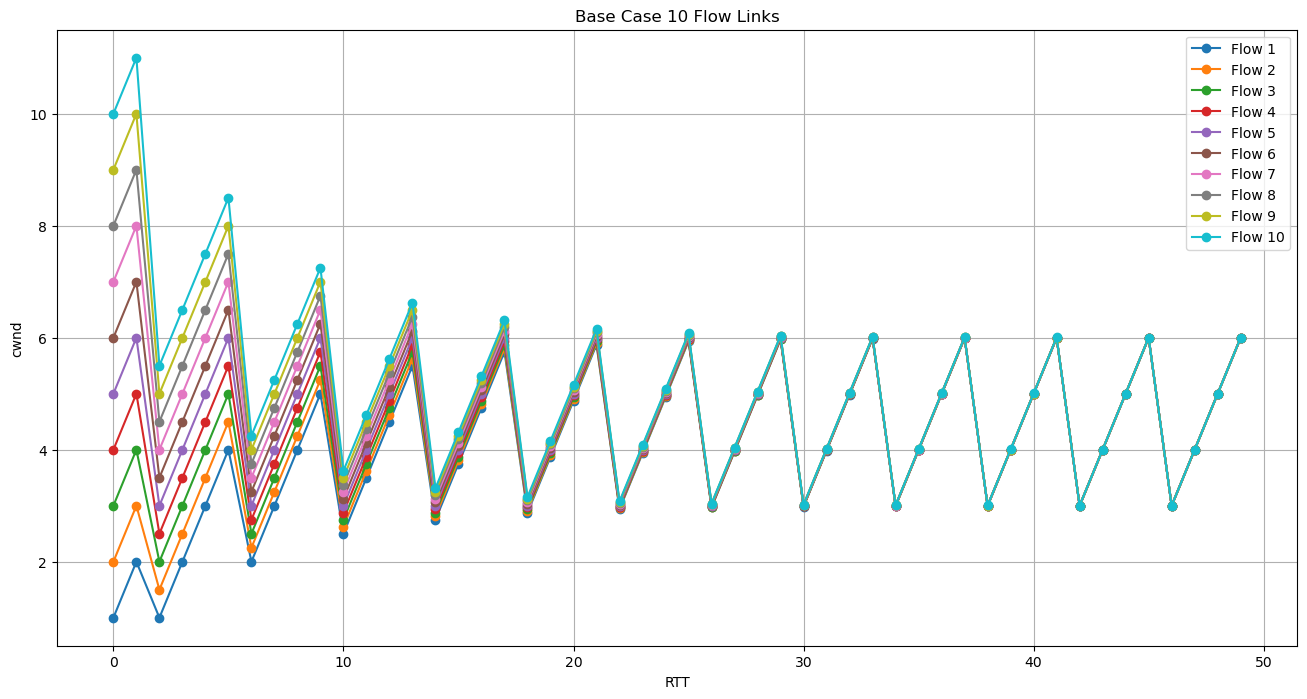

In [521]:
iterations = 50

aimd1 = 1
aimd2 = 2
aimd3 = 3
aimd4 = 4
aimd5 = 5
aimd6 = 6
aimd7 = 7
aimd8 = 8
aimd9 = 9
aimd10 = 10
capacity = 60
flows = 10

beta = 0.5
count = 0

aimd1Vals, aimd2Vals = [], []
aimd3Vals, aimd4Vals = [], []
aimd5Vals, aimd6Vals = [], []
aimd7Vals, aimd8Vals = [], []
aimd9Vals, aimd10Vals = [], []

for i in range(iterations):
    aimd1Vals.append(aimd1)
    aimd2Vals.append(aimd2)
    aimd3Vals.append(aimd3)
    aimd4Vals.append(aimd4)
    aimd5Vals.append(aimd5)
    aimd6Vals.append(aimd6)
    aimd7Vals.append(aimd7)
    aimd8Vals.append(aimd8)
    aimd9Vals.append(aimd9)
    aimd10Vals.append(aimd10)

    #if congestion not detected
    if (aimd1 + aimd2 + aimd3 + aimd4 + aimd5 + aimd6 + aimd7 + aimd8 + aimd9 + aimd10 <= capacity):
        aimd1 = aimd1 + alpha
        aimd2 = aimd2 + alpha
        aimd3 = aimd3 + alpha
        aimd4 = aimd4 + alpha
        aimd5 = aimd5 + alpha
        aimd6 = aimd6 + alpha
        aimd7 = aimd7 + alpha
        aimd8 = aimd8 + alpha
        aimd9 = aimd9 + alpha
        aimd10 = aimd10 + alpha
    else:
        aimd1 = aimd1 * beta
        aimd2 = aimd2 * beta
        aimd3 = aimd3 * beta
        aimd4 = aimd4 * beta
        aimd5 = aimd5 * beta
        aimd6 = aimd6 * beta
        aimd7 = aimd7 * beta
        aimd8 = aimd8 * beta
        aimd9 = aimd9 * beta
        aimd10 = aimd10 * beta
        count += 1

print("no. of times overhead:", count)

plt.figure(figsize = (16, 8))
plt.plot(range(iterations), aimd1Vals, '-o', label = 'Flow 1')
plt.plot(range(iterations), aimd2Vals, '-o', label = 'Flow 2')
plt.plot(range(iterations), aimd3Vals, '-o', label = 'Flow 3')
plt.plot(range(iterations), aimd4Vals, '-o', label = 'Flow 4')
plt.plot(range(iterations), aimd5Vals, '-o', label = 'Flow 5')
plt.plot(range(iterations), aimd6Vals, '-o', label = 'Flow 6')
plt.plot(range(iterations), aimd7Vals, '-o', label = 'Flow 7')
plt.plot(range(iterations), aimd8Vals, '-o', label = 'Flow 8')
plt.plot(range(iterations), aimd9Vals, '-o', label = 'Flow 9')
plt.plot(range(iterations), aimd10Vals, '-o', label = 'Flow 10')

plt.xlabel('RTT')
plt.ylabel('cwnd')
plt.title('Base Case 10 Flow Links')
plt.grid(True)
plt.legend()
plt.show()

Increase Alpha

Final tcp: 2.9999999701976776
Final aimd: 3.000000149011612
no. of times overhead: 25


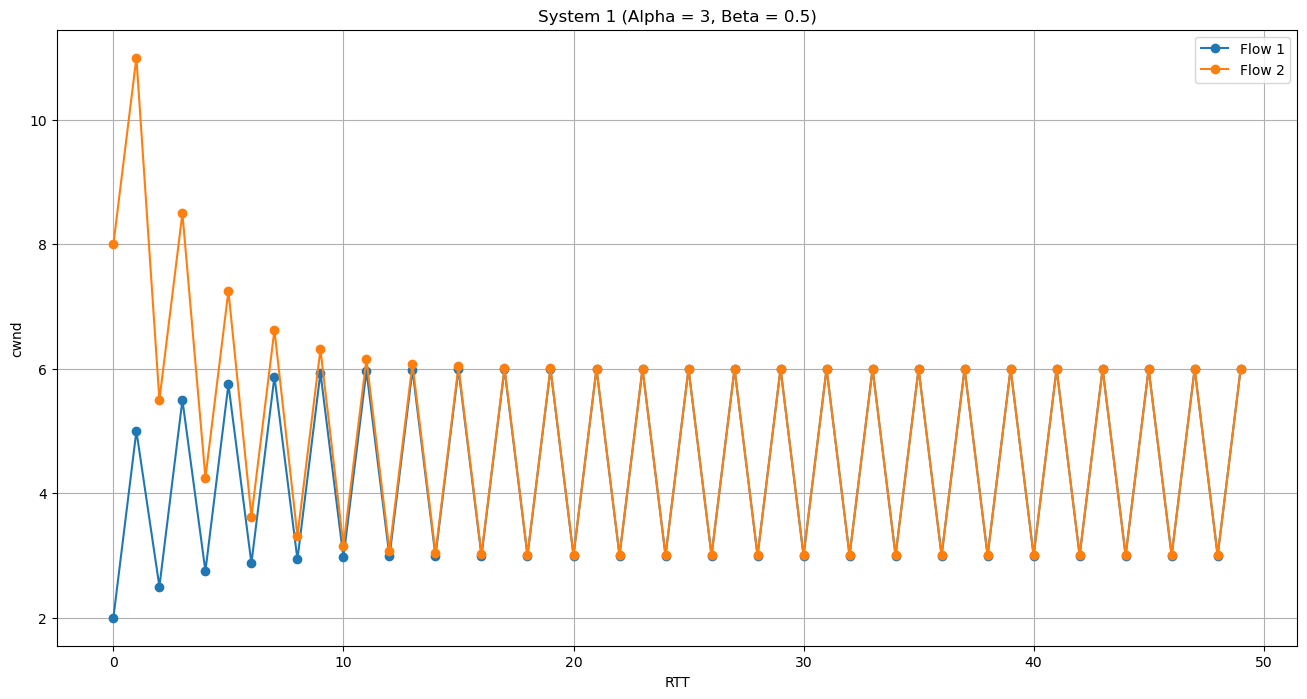

In [522]:
iterations = 50

aimd1 = 2
aimd2 = 8
capacity = 10

beta = 0.5
alpha = 3
count = 0

aimd1Vals, aimd2Vals = [], []

for i in range(iterations):
    aimd1Vals.append(aimd1)
    aimd2Vals.append(aimd2)
    #if congestion not detected
    if (aimd1 + aimd2 <= capacity):
        aimd1 = aimd1 + alpha
        aimd2 = aimd2 + alpha

    else:
        aimd1 = aimd1 * beta
        aimd2 = aimd2 * beta
        count += 1

print("Final tcp:", aimd1)
print("Final aimd:", aimd2)
print("no. of times overhead:", count)

plt.figure(figsize = (16, 8))
plt.plot(range(iterations), aimd1Vals, '-o', label = 'Flow 1')
plt.plot(range(iterations), aimd2Vals, '-o', label = 'Flow 2')

plt.xlabel('RTT')
plt.ylabel('cwnd')
plt.title('System 1 (Alpha = 3, Beta = 0.5)')
plt.grid(True)
plt.legend()
plt.show()

Lower Beta 0.2

Final tcp: 3.9999997952
Final aimd: 4.0000004096
no. of times overhead: 10


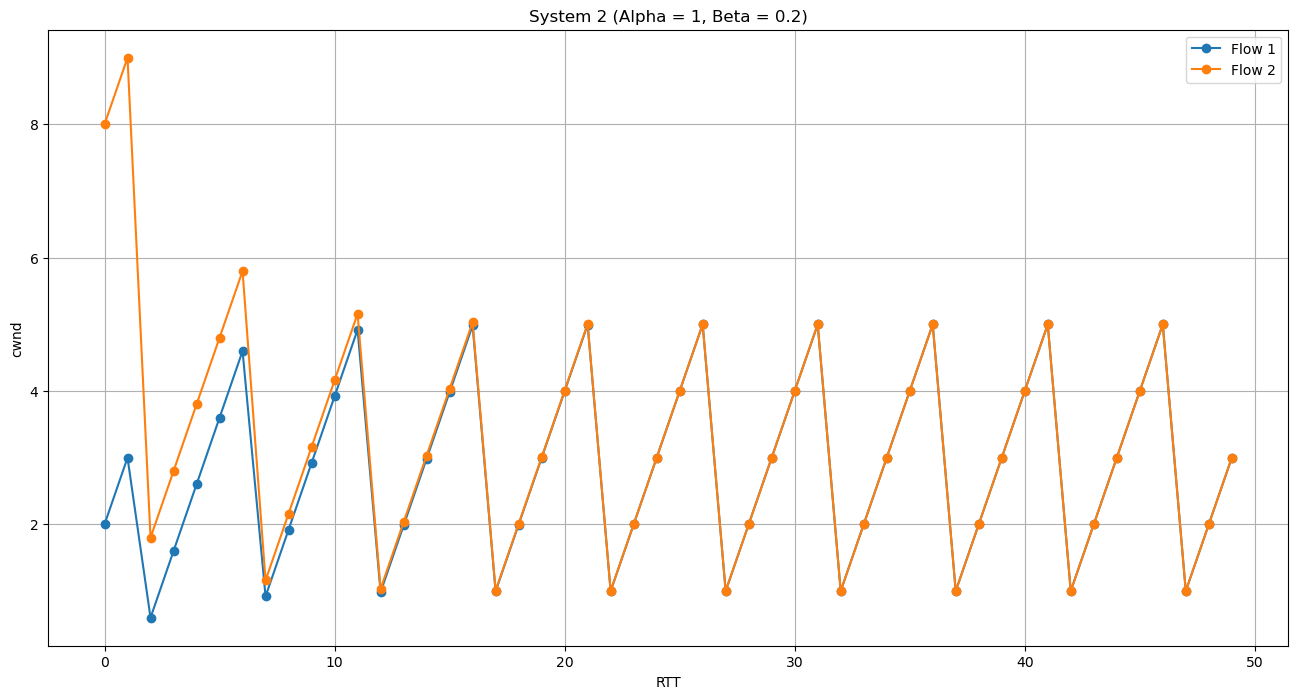

In [523]:
iterations = 50

aimd1 = 2
aimd2 = 8
capacity = 10

beta = 0.2
alpha = 1
count = 0

aimd1Vals, aimd2Vals = [], []

for i in range(iterations):
    aimd1Vals.append(aimd1)
    aimd2Vals.append(aimd2)
    #if congestion not detected
    if (aimd1 + aimd2 <= capacity):
        aimd1 = aimd1 + alpha
        aimd2 = aimd2 + alpha

    else:
        aimd1 = aimd1 * beta
        aimd2 = aimd2 * beta
        count += 1

print("Final tcp:", aimd1)
print("Final aimd:", aimd2)
print("no. of times overhead:", count)

plt.figure(figsize = (16, 8))
plt.plot(range(iterations), aimd1Vals, '-o', label = 'Flow 1')
plt.plot(range(iterations), aimd2Vals, '-o', label = 'Flow 2')

plt.xlabel('RTT')
plt.ylabel('cwnd')
plt.title('System 2 (Alpha = %d, Beta = %.1f)'%(alpha, beta))
plt.grid(True)
plt.legend()
plt.show()

Higher Beta 0.8

Final tcp: 3.99244421362741
Final aimd: 4.015111572745183
no. of times overhead: 25


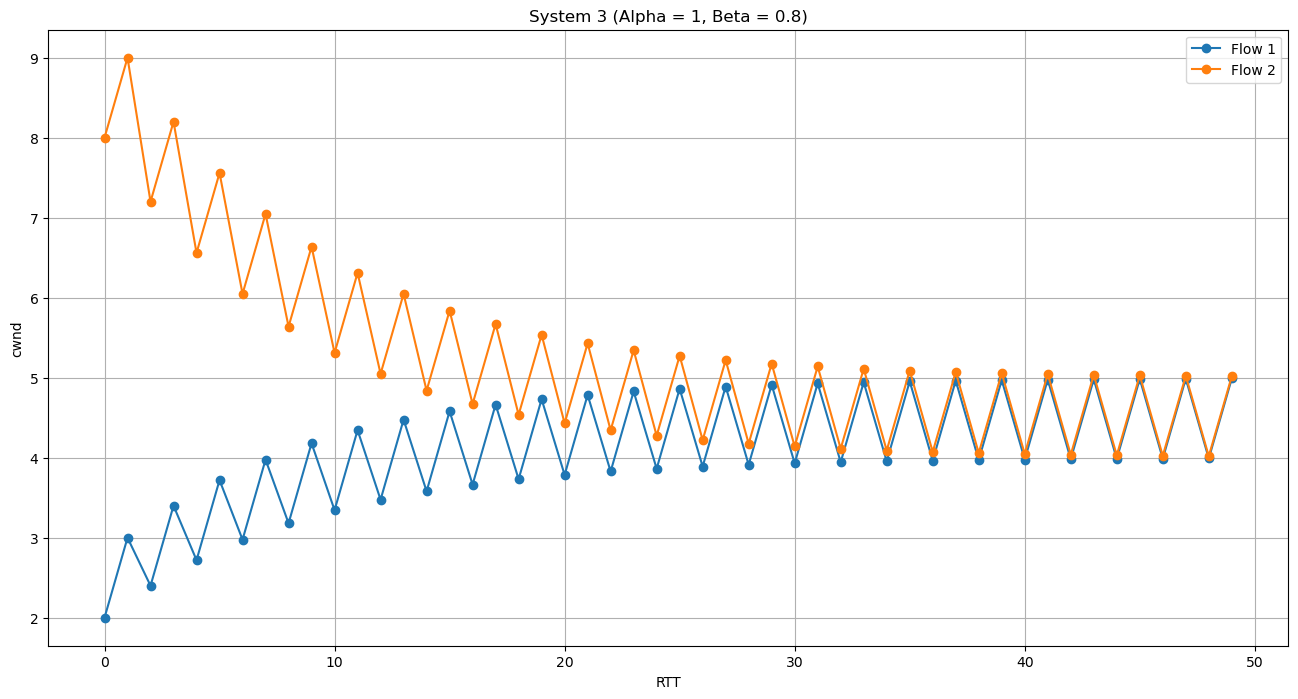

In [524]:
iterations = 50

aimd1 = 2
aimd2 = 8
capacity = 10

beta = 0.8
alpha = 1
count = 0

aimd1Vals, aimd2Vals = [], []

for i in range(iterations):
    aimd1Vals.append(aimd1)
    aimd2Vals.append(aimd2)
    #if congestion not detected
    if (aimd1 + aimd2 <= capacity):
        aimd1 = aimd1 + alpha
        aimd2 = aimd2 + alpha

    else:
        aimd1 = aimd1 * beta
        aimd2 = aimd2 * beta
        count += 1

print("Final tcp:", aimd1)
print("Final aimd:", aimd2)
print("no. of times overhead:", count)

plt.figure(figsize = (16, 8))
plt.plot(range(iterations), aimd1Vals, '-o', label = 'Flow 1')
plt.plot(range(iterations), aimd2Vals, '-o', label = 'Flow 2')

plt.xlabel('RTT')
plt.ylabel('cwnd')
plt.title('System 3 (Alpha = %d, Beta = %.1f)'%(alpha, beta))
plt.grid(True)
plt.legend()
plt.show()

Exponential Alpha

Final tcp: 2.571242066573447
Final aimd: 2.571242066573447
no. of times overhead: 13


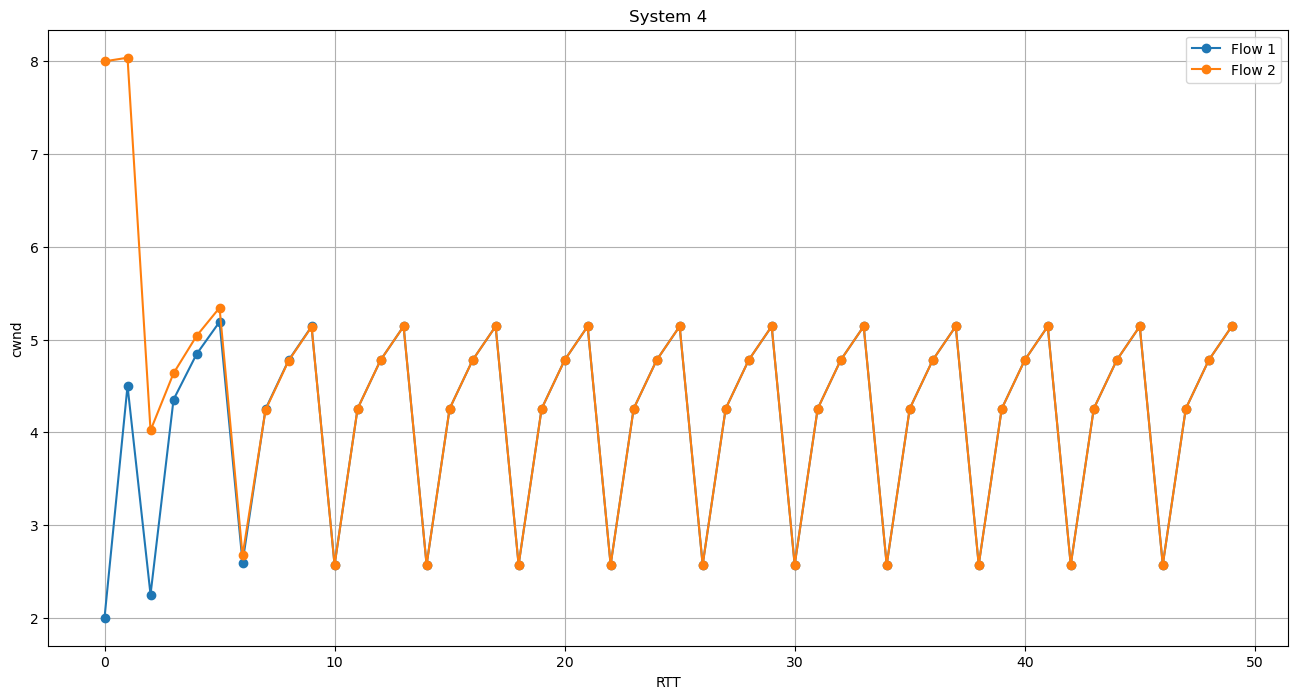

In [525]:
iterations = 50

aimd1 = 2
aimd2 = 8
capacity = 10

beta = 0.5
count = 0

aimd1Vals, aimd2Vals = [], []

for i in range(iterations):
    aimd1Vals.append(aimd1)
    aimd2Vals.append(aimd2)
    #if congestion not detected
    if (aimd1 + aimd2 <= capacity):
        aimd1 = aimd1 + 10/(math.pow(2, aimd1))
        aimd2 = aimd2 + 10/(math.pow(2, aimd2))

    else:
        aimd1 = aimd1 * beta
        aimd2 = aimd2 * beta
        count += 1

print("Final tcp:", aimd1)
print("Final aimd:", aimd2)
print("no. of times overhead:", count)

plt.figure(figsize = (16, 8))
plt.plot(range(iterations), aimd1Vals, '-o', label = 'Flow 1')
plt.plot(range(iterations), aimd2Vals, '-o', label = 'Flow 2')

plt.xlabel('RTT')
plt.ylabel('cwnd')
plt.title('System 4')
plt.grid(True)
plt.legend()
plt.show()

Exponential Alpha with 10 Flow Links

Final tcp: 9.494320917999884
Final aimd: 9.897434826755017
no. of times overhead: 0


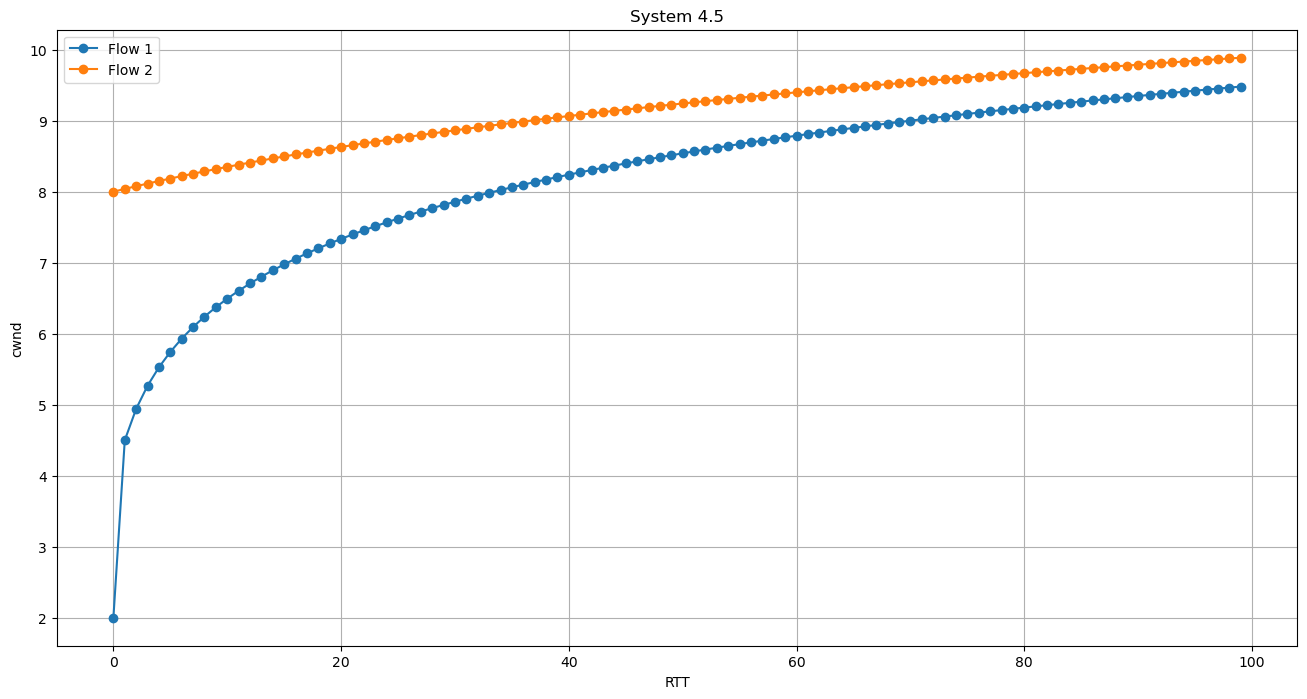

In [526]:
iterations = 100

aimd1 = 2
aimd2 = 8
capacity = 20

beta = 0.5
alpha = 1
count = 0

aimd1Vals, aimd2Vals = [], []

for i in range(iterations):
    aimd1Vals.append(aimd1)
    aimd2Vals.append(aimd2)
    #if congestion not detected
    if (aimd1 + aimd2 <= capacity):
        aimd1 = aimd1 + 10/(math.pow(2, aimd1))
        aimd2 = aimd2 + 10/(math.pow(2, aimd2))

    else:
        aimd1 = aimd1 * beta
        aimd2 = aimd2 * beta
        count += 1

print("Final tcp:", aimd1)
print("Final aimd:", aimd2)
print("no. of times overhead:", count)

plt.figure(figsize = (16, 8))
plt.plot(range(iterations), aimd1Vals, '-o', label = 'Flow 1')
plt.plot(range(iterations), aimd2Vals, '-o', label = 'Flow 2')

plt.xlabel('RTT')
plt.ylabel('cwnd')
plt.title('System 4.5')
plt.grid(True)
plt.legend()
plt.show()

Logarithm Alpha

Final tcp: 3.0569897442634852
Final aimd: 3.0569897442634852
no. of times overhead: 34


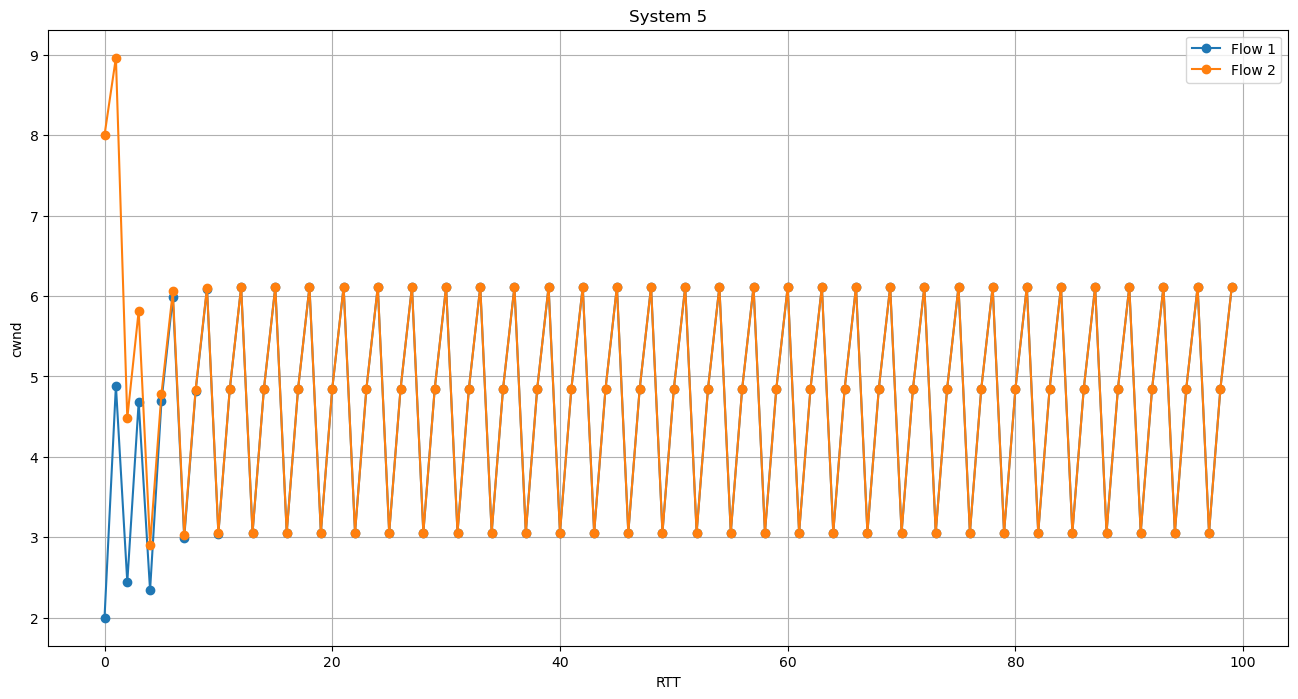

In [527]:
iterations = 100

aimd1 = 2
aimd2 = 8
capacity = 10

alpha = 2
beta = 0.5
count = 0

aimd1Vals, aimd2Vals = [], []

for i in range(iterations):
    aimd1Vals.append(aimd1)
    aimd2Vals.append(aimd2)
    #if congestion not detected
    if (aimd1 + aimd2 <= capacity):
        aimd1 = aimd1 + 2/((math.log(aimd1)))
        aimd2 = aimd2 + 2/((math.log(aimd2)))

    else:
        aimd1 = aimd1 * beta
        aimd2 = aimd2 * beta
        count += 1

print("Final tcp:", aimd1)
print("Final aimd:", aimd2)
print("no. of times overhead:", count)

plt.figure(figsize = (16, 8))
plt.plot(range(iterations), aimd1Vals, '-o', label = 'Flow 1')
plt.plot(range(iterations), aimd2Vals, '-o', label = 'Flow 2')

plt.xlabel('RTT')
plt.ylabel('cwnd')
plt.title('System 5')
plt.grid(True)
plt.legend()
plt.show()

Logarithm Alpha with 10 Flow Links

no. of times overhead: 13


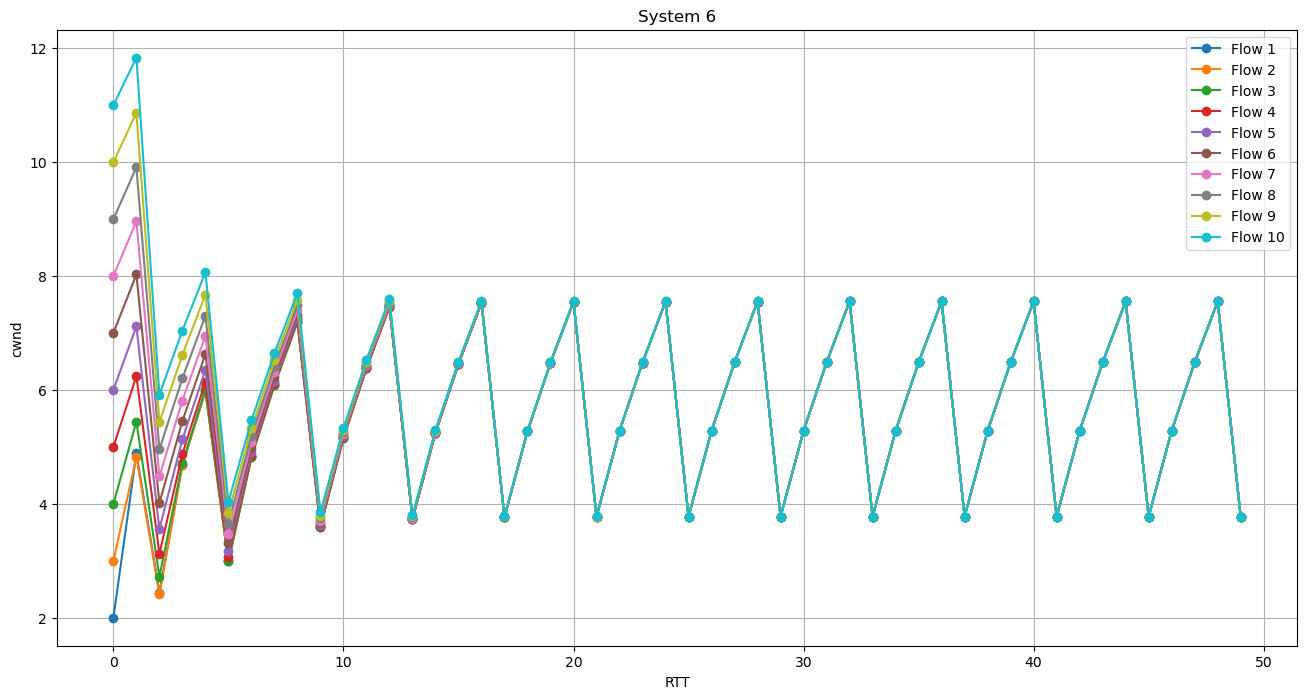

In [528]:
iterations = 50

aimd1 = 2
aimd2 = 3
aimd3 = 4
aimd4 = 5
aimd5 = 6
aimd6 = 7
aimd7 = 8
aimd8 = 9
aimd9 = 10
aimd10 = 11
capacity = 65
flows = 10

beta = 0.5
count = 0

alpha = 2

aimd1Vals, aimd2Vals = [], []
aimd3Vals, aimd4Vals = [], []
aimd5Vals, aimd6Vals = [], []
aimd7Vals, aimd8Vals = [], []
aimd9Vals, aimd10Vals = [], []

for i in range(iterations):
    aimd1Vals.append(aimd1)
    aimd2Vals.append(aimd2)
    aimd3Vals.append(aimd3)
    aimd4Vals.append(aimd4)
    aimd5Vals.append(aimd5)
    aimd6Vals.append(aimd6)
    aimd7Vals.append(aimd7)
    aimd8Vals.append(aimd8)
    aimd9Vals.append(aimd9)
    aimd10Vals.append(aimd10)

    #if congestion not detected
    if (aimd1 + aimd2 + aimd3 + aimd4 + aimd5 + aimd6 + aimd7 + aimd8 + aimd9 + aimd10 <= capacity):
        aimd1 = aimd1 + alpha/(math.log(aimd1))
        aimd2 = aimd2 + alpha/(math.log(aimd2))
        aimd3 = aimd3 + alpha/(math.log(aimd3))
        aimd4 = aimd4 + alpha/(math.log(aimd4))
        aimd5 = aimd5 + alpha/(math.log(aimd5))
        aimd6 = aimd6 + alpha/(math.log(aimd6))
        aimd7 = aimd7 + alpha/(math.log(aimd7))
        aimd8 = aimd8 + alpha/(math.log(aimd8))
        aimd9 = aimd9 + alpha/(math.log(aimd9))
        aimd10 = aimd10 + alpha/(math.log(aimd10))

    else:
        aimd1 = aimd1 * beta
        aimd2 = aimd2 * beta
        aimd3 = aimd3 * beta
        aimd4 = aimd4 * beta
        aimd5 = aimd5 * beta
        aimd6 = aimd6 * beta
        aimd7 = aimd7 * beta
        aimd8 = aimd8 * beta
        aimd9 = aimd9 * beta
        aimd10 = aimd10 * beta
        count += 1

print("no. of times overhead:", count)

plt.figure(figsize = (16, 8))
plt.plot(range(iterations), aimd1Vals, '-o', label = 'Flow 1')
plt.plot(range(iterations), aimd2Vals, '-o', label = 'Flow 2')
plt.plot(range(iterations), aimd3Vals, '-o', label = 'Flow 3')
plt.plot(range(iterations), aimd4Vals, '-o', label = 'Flow 4')
plt.plot(range(iterations), aimd5Vals, '-o', label = 'Flow 5')
plt.plot(range(iterations), aimd6Vals, '-o', label = 'Flow 6')
plt.plot(range(iterations), aimd7Vals, '-o', label = 'Flow 7')
plt.plot(range(iterations), aimd8Vals, '-o', label = 'Flow 8')
plt.plot(range(iterations), aimd9Vals, '-o', label = 'Flow 9')
plt.plot(range(iterations), aimd10Vals, '-o', label = 'Flow 10')

plt.xlabel('RTT')
plt.ylabel('cwnd')
plt.title('System 6')
plt.grid(True)
plt.legend()
plt.show()

1/sqrt cwnd Beta

Final tcp: 4.458710491747705
Final aimd: 4.4587104917556415
no. of times overhead: 25


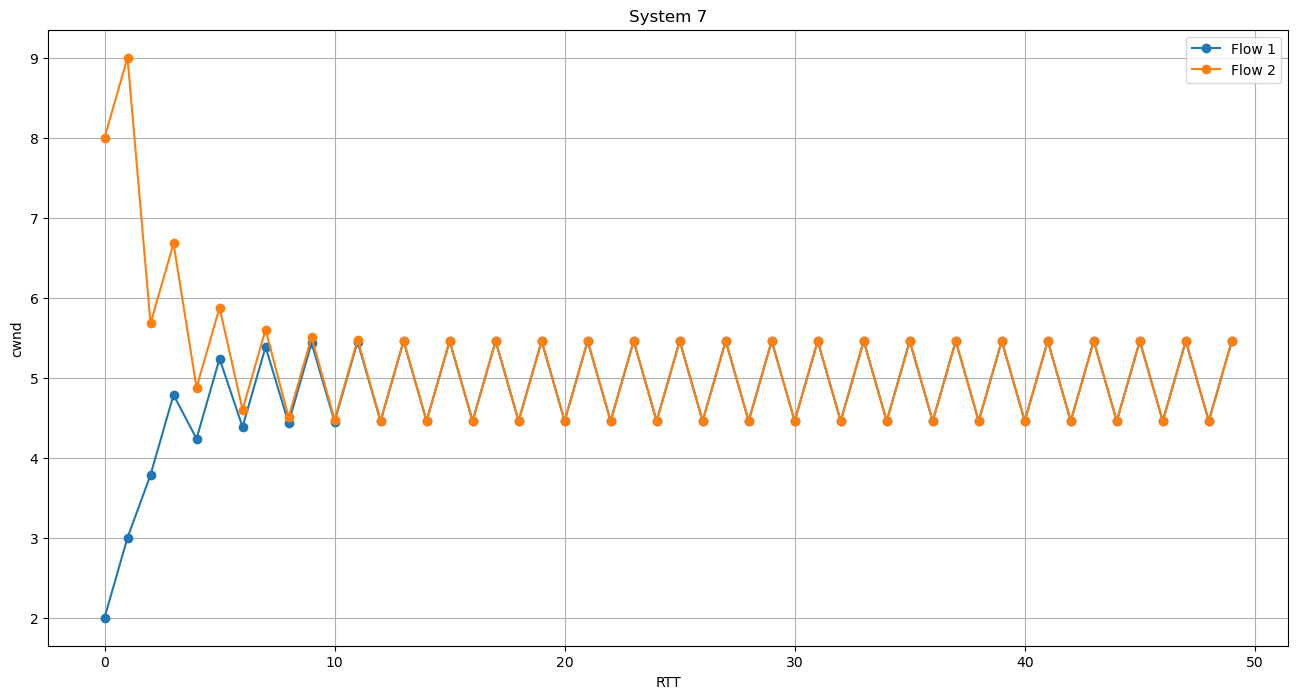

In [529]:
iterations = 50

aimd1 = 2
aimd2 = 8
capacity = 10

alpha = 1
beta = 0.5
count = 0

aimd1Vals, aimd2Vals = [], []

for i in range(iterations):
    aimd1Vals.append(aimd1)
    aimd2Vals.append(aimd2)
    #if congestion not detected
    if (aimd1 + aimd2 <= capacity):
        aimd1 = aimd1 + alpha
        aimd2 = aimd2 + alpha

    else:
        aimd1 = aimd1 * 2/math.log(aimd1,2)
        aimd2 = aimd2 * 2/math.log(aimd2,2)
        count += 1

print("Final tcp:", aimd1)
print("Final aimd:", aimd2)
print("no. of times overhead:", count)

plt.figure(figsize = (16, 8))
plt.plot(range(iterations), aimd1Vals, '-o', label = 'Flow 1')
plt.plot(range(iterations), aimd2Vals, '-o', label = 'Flow 2')

plt.xlabel('RTT')
plt.ylabel('cwnd')
plt.title('System 7')
plt.grid(True)
plt.legend()
plt.show()

1/sqrt(cwnd) Beta 10 Flow Links

no. of times overhead: 17


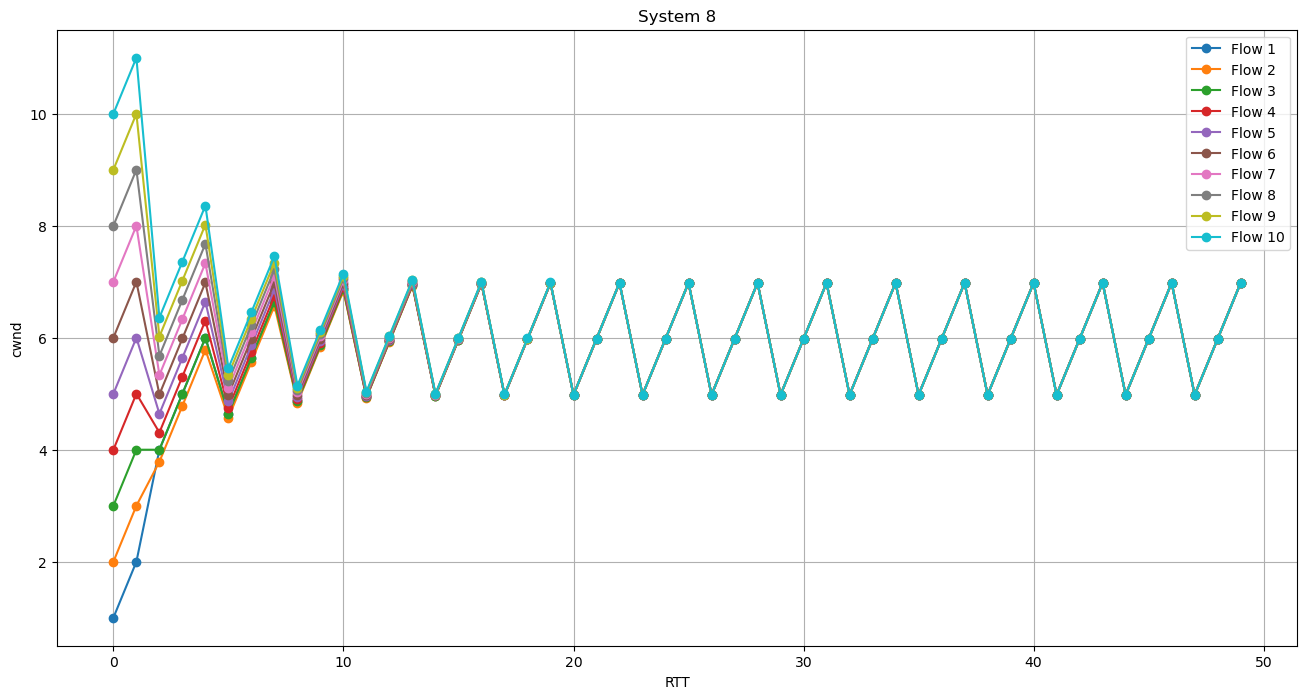

In [530]:
iterations = 50

aimd1 = 1
aimd2 = 2
aimd3 = 3
aimd4 = 4
aimd5 = 5
aimd6 = 6
aimd7 = 7
aimd8 = 8
aimd9 = 9
aimd10 = 10
capacity = 60
flows = 10

beta = 0.5
count = 0

aimd1Vals, aimd2Vals = [], []
aimd3Vals, aimd4Vals = [], []
aimd5Vals, aimd6Vals = [], []
aimd7Vals, aimd8Vals = [], []
aimd9Vals, aimd10Vals = [], []

for i in range(iterations):
    aimd1Vals.append(aimd1)
    aimd2Vals.append(aimd2)
    aimd3Vals.append(aimd3)
    aimd4Vals.append(aimd4)
    aimd5Vals.append(aimd5)
    aimd6Vals.append(aimd6)
    aimd7Vals.append(aimd7)
    aimd8Vals.append(aimd8)
    aimd9Vals.append(aimd9)
    aimd10Vals.append(aimd10)

    #if congestion not detected
    if (aimd1 + aimd2 + aimd3 + aimd4 + aimd5 + aimd6 + aimd7 + aimd8 + aimd9 + aimd10 <= capacity):
        aimd1 = aimd1 + alpha
        aimd2 = aimd2 + alpha
        aimd3 = aimd3 + alpha
        aimd4 = aimd4 + alpha
        aimd5 = aimd5 + alpha
        aimd6 = aimd6 + alpha
        aimd7 = aimd7 + alpha
        aimd8 = aimd8 + alpha
        aimd9 = aimd9 + alpha
        aimd10 = aimd10 + alpha
    else:
        aimd1 = aimd1 * 2/math.log(aimd1,2)
        aimd2 = aimd2 * 2/math.log(aimd2,2)
        aimd3 = aimd3 * 2/math.log(aimd3,2)
        aimd4 = aimd4 * 2/math.log(aimd4,2)
        aimd5 = aimd5 * 2/math.log(aimd5,2)
        aimd6 = aimd6 * 2/math.log(aimd6,2)
        aimd7 = aimd7 * 2/math.log(aimd7,2)
        aimd8 = aimd8 * 2/math.log(aimd8,2)
        aimd9 = aimd9 * 2/math.log(aimd9,2)
        aimd10 = aimd10 * 2/math.log(aimd10,2)
        count += 1

print("no. of times overhead:", count)

plt.figure(figsize = (16, 8))
plt.plot(range(iterations), aimd1Vals, '-o', label = 'Flow 1')
plt.plot(range(iterations), aimd2Vals, '-o', label = 'Flow 2')
plt.plot(range(iterations), aimd3Vals, '-o', label = 'Flow 3')
plt.plot(range(iterations), aimd4Vals, '-o', label = 'Flow 4')
plt.plot(range(iterations), aimd5Vals, '-o', label = 'Flow 5')
plt.plot(range(iterations), aimd6Vals, '-o', label = 'Flow 6')
plt.plot(range(iterations), aimd7Vals, '-o', label = 'Flow 7')
plt.plot(range(iterations), aimd8Vals, '-o', label = 'Flow 8')
plt.plot(range(iterations), aimd9Vals, '-o', label = 'Flow 9')
plt.plot(range(iterations), aimd10Vals, '-o', label = 'Flow 10')

plt.xlabel('RTT')
plt.ylabel('cwnd')
plt.title('System 8')
plt.grid(True)
plt.legend()
plt.show()

Combing desired alpha and beta update

Final tcp: 4.616188025672997
Final aimd: 4.616188025673065
no. of times overhead: 25


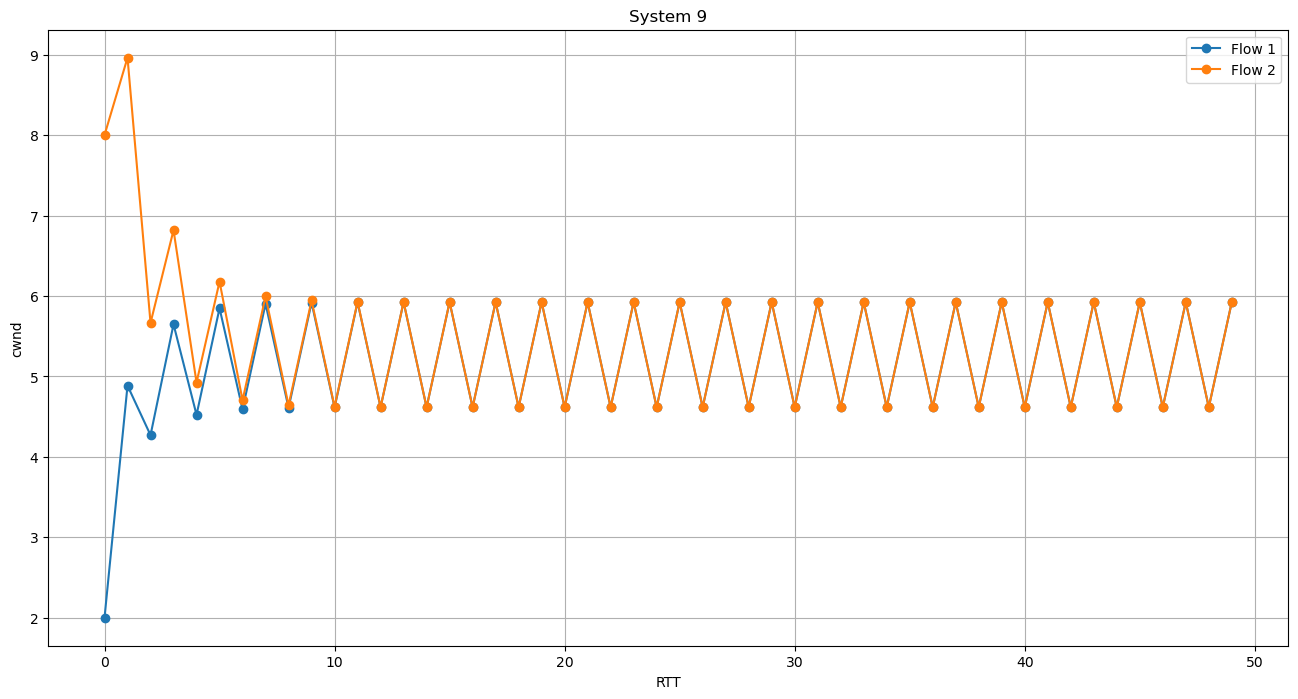

In [531]:
iterations = 50

aimd1 = 2
aimd2 = 8
capacity = 10

alpha = 2
beta = 0.5
count = 0

aimd1Vals, aimd2Vals = [], []

for i in range(iterations):
    aimd1Vals.append(aimd1)
    aimd2Vals.append(aimd2)
    #if congestion not detected
    if (aimd1 + aimd2 <= capacity):
        aimd1 = aimd1 + alpha/((math.log(aimd1)))
        aimd2 = aimd2 + alpha/((math.log(aimd2)))

    else:
        aimd1 = aimd1 * 2/math.log(aimd1,2)
        aimd2 = aimd2 * 2/math.log(aimd2,2)
        count += 1

print("Final tcp:", aimd1)
print("Final aimd:", aimd2)
print("no. of times overhead:", count)

plt.figure(figsize = (16, 8))
plt.plot(range(iterations), aimd1Vals, '-o', label = 'Flow 1')
plt.plot(range(iterations), aimd2Vals, '-o', label = 'Flow 2')

plt.xlabel('RTT')
plt.ylabel('cwnd')
plt.title('System 9')
plt.grid(True)
plt.legend()
plt.show()

Testing with High Speed 

Final tcp: 36.63376254949595
Final aimd: 36.75433466641189
no. of times overhead: 4


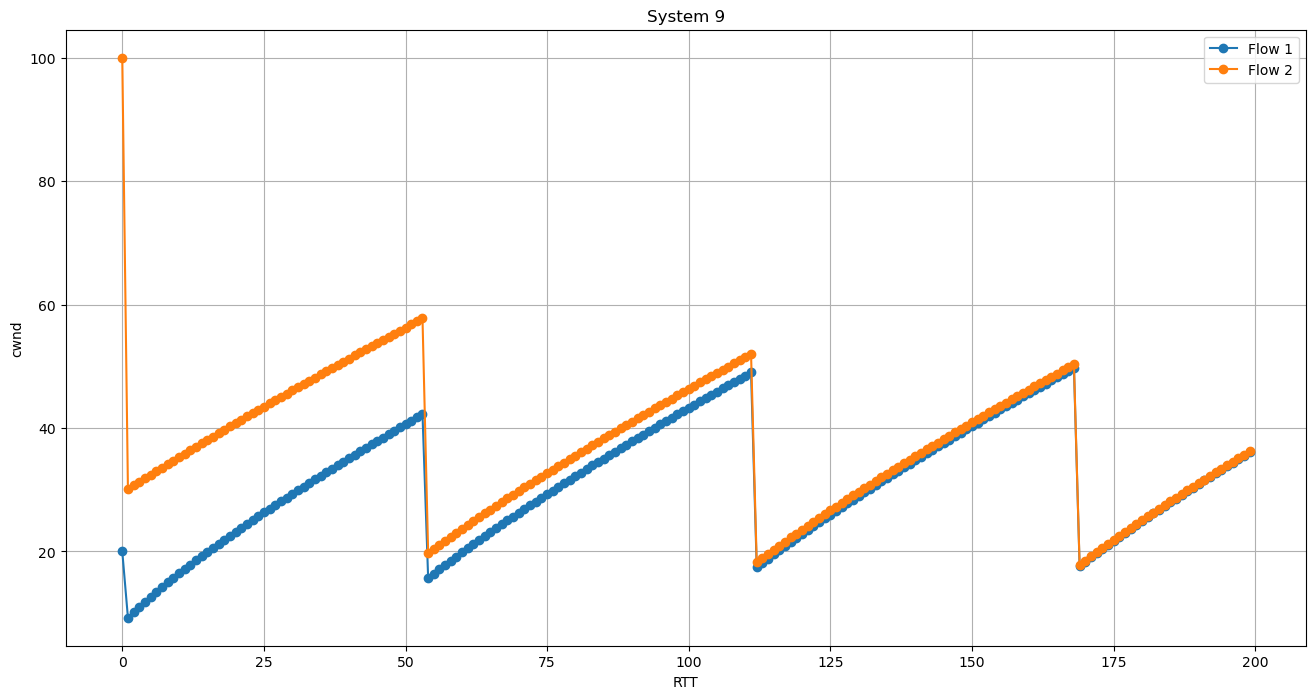

In [549]:
iterations = 200

aimd1 = 20
aimd2 = 100
capacity = 100

alpha = 2
beta = 0.5
count = 0

aimd1Vals, aimd2Vals = [], []

for i in range(iterations):
    aimd1Vals.append(aimd1)
    aimd2Vals.append(aimd2)
    #if congestion not detected
    if (aimd1 + aimd2 <= capacity):
        aimd1 = aimd1 + 2/((math.log(aimd1)))
        aimd2 = aimd2 + 2/((math.log(aimd2)))

    else:
        aimd1 = aimd1 * 2/math.log(aimd1,2)
        aimd2 = aimd2 * 2/math.log(aimd2,2)
        count += 1

print("Final tcp:", aimd1)
print("Final aimd:", aimd2)
print("no. of times overhead:", count)

plt.figure(figsize = (16, 8))
plt.plot(range(iterations), aimd1Vals, '-o', label = 'Flow 1')
plt.plot(range(iterations), aimd2Vals, '-o', label = 'Flow 2')

plt.xlabel('RTT')
plt.ylabel('cwnd')
plt.title('System 9')
plt.grid(True)
plt.legend()
plt.show()

High speed network

no. of times overhead: 10


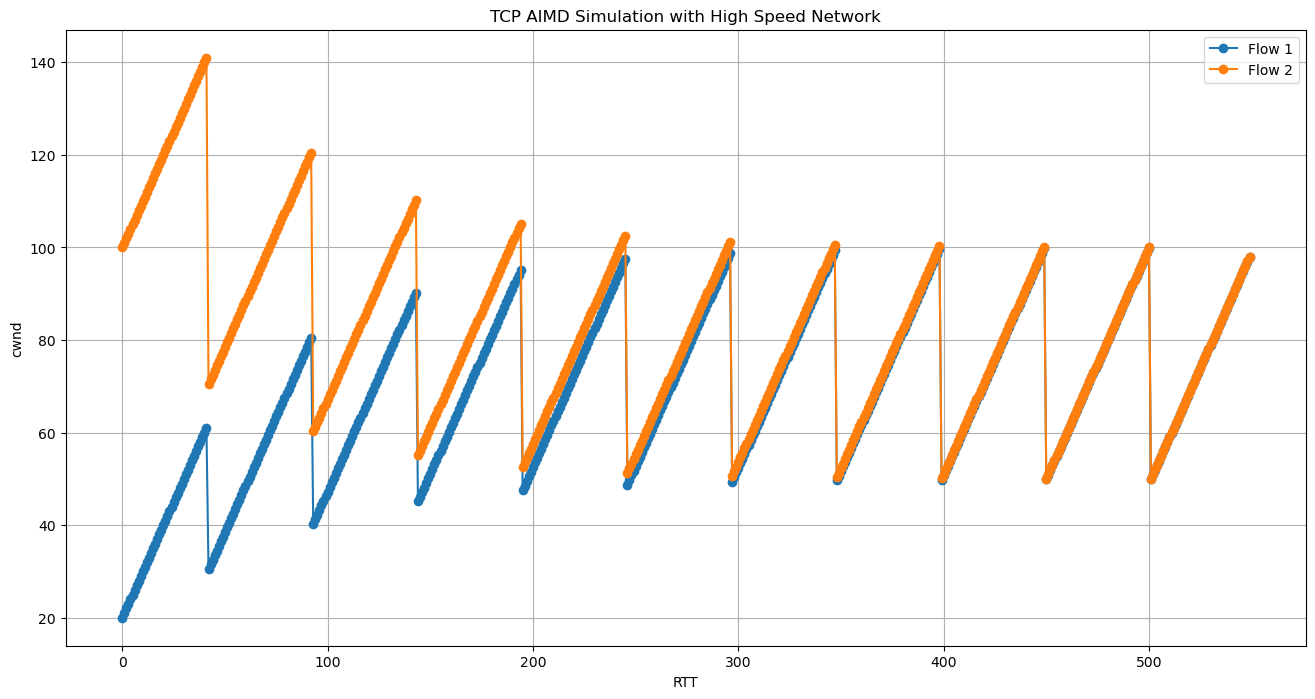

In [533]:
iterations = 550

aimd1 = 20
aimd2 = 100
capacity = 200

alpha = 1
beta = 0.5
count = 0

aimd1Vals, aimd2Vals = [], []

for i in range(iterations):
    aimd1Vals.append(aimd1)
    aimd2Vals.append(aimd2)
    #if congestion not detected
    if (aimd1 + aimd2 <= capacity):
        aimd1 = aimd1 + alpha
        aimd2 = aimd2 + alpha

    else:
        aimd1 = aimd1 * beta
        aimd2 = aimd2 * beta
        count += 1


print("no. of times overhead:", count)

plt.figure(figsize = (16, 8))
plt.plot(range(iterations), aimd1Vals, '-o', label = 'Flow 1')
plt.plot(range(iterations), aimd2Vals, '-o', label = 'Flow 2')

plt.xlabel('RTT')
plt.ylabel('cwnd')
plt.title('TCP AIMD Simulation with High Speed Network')
plt.grid(True)
plt.legend()
plt.show()

Slow Start

no. of times overhead: 3


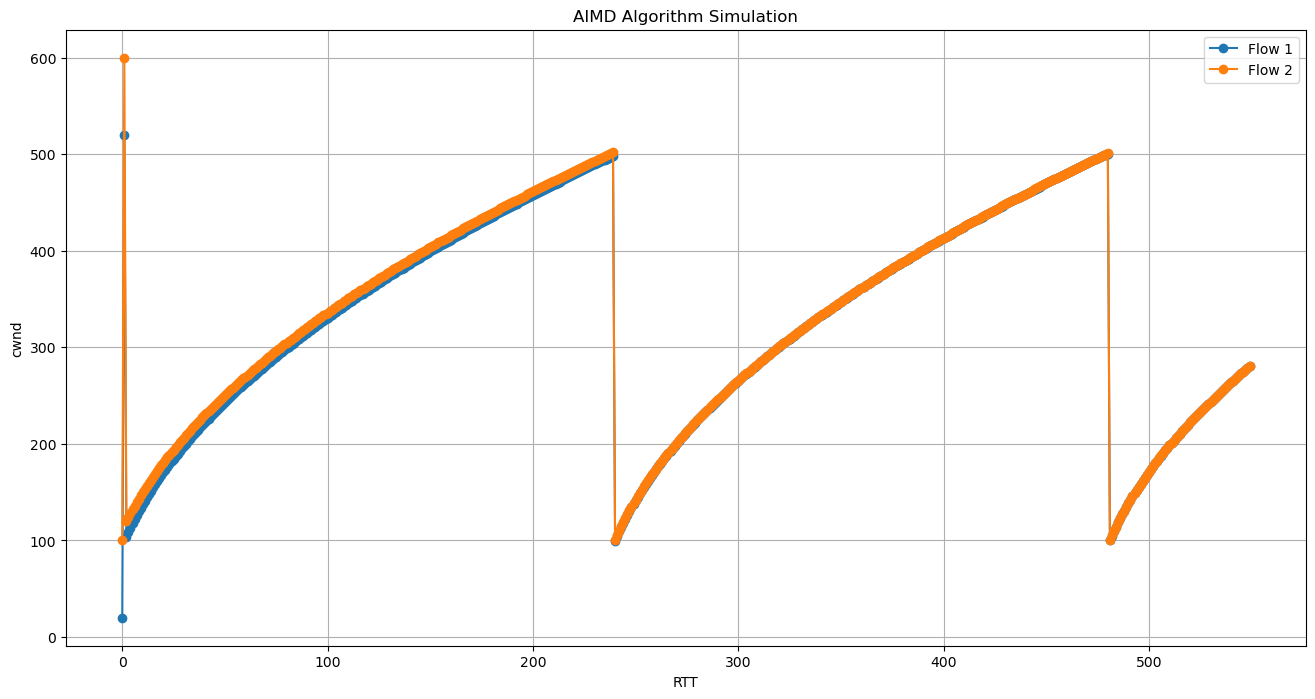

In [534]:
iterations = 550

aimd1 = 20
aimd2 = 100
capacity = 1000
ssthresh1 = aimd1*3/2
ssthresh2 = aimd2*3/2

beta = 0.2
alpha = capacity/2
count = 0

aimd1Vals, aimd2Vals = [], []

for i in range(iterations):
    aimd1Vals.append(aimd1)
    aimd2Vals.append(aimd2)
    #if congestion not detected
    if (aimd1 + aimd2 <= capacity):
        #slow start phase
        if (aimd1 < ssthresh1):
            aimd1 = aimd1 + alpha
        else:
            aimd1 = aimd1 + alpha/aimd1

        if (aimd2 < ssthresh2):
            aimd2 = aimd2 + alpha
        else:
            aimd2 = aimd2 + alpha/aimd2
    else:
        ssthresh1 = aimd1* beta
        aimd1 = ssthresh1
        ssthresh2 = aimd2* beta
        aimd2 = ssthresh2
        count += 1

print("no. of times overhead:", count)

plt.figure(figsize = (16, 8))
plt.plot(range(iterations), aimd1Vals, '-o', label = 'Flow 1')
plt.plot(range(iterations), aimd2Vals, '-o', label = 'Flow 2')

plt.xlabel('RTT')
plt.ylabel('cwnd')
plt.title('AIMD Algorithm Simulation')
plt.grid(True)
plt.legend()
plt.show()

Different priorities

no. of times overhead: 9


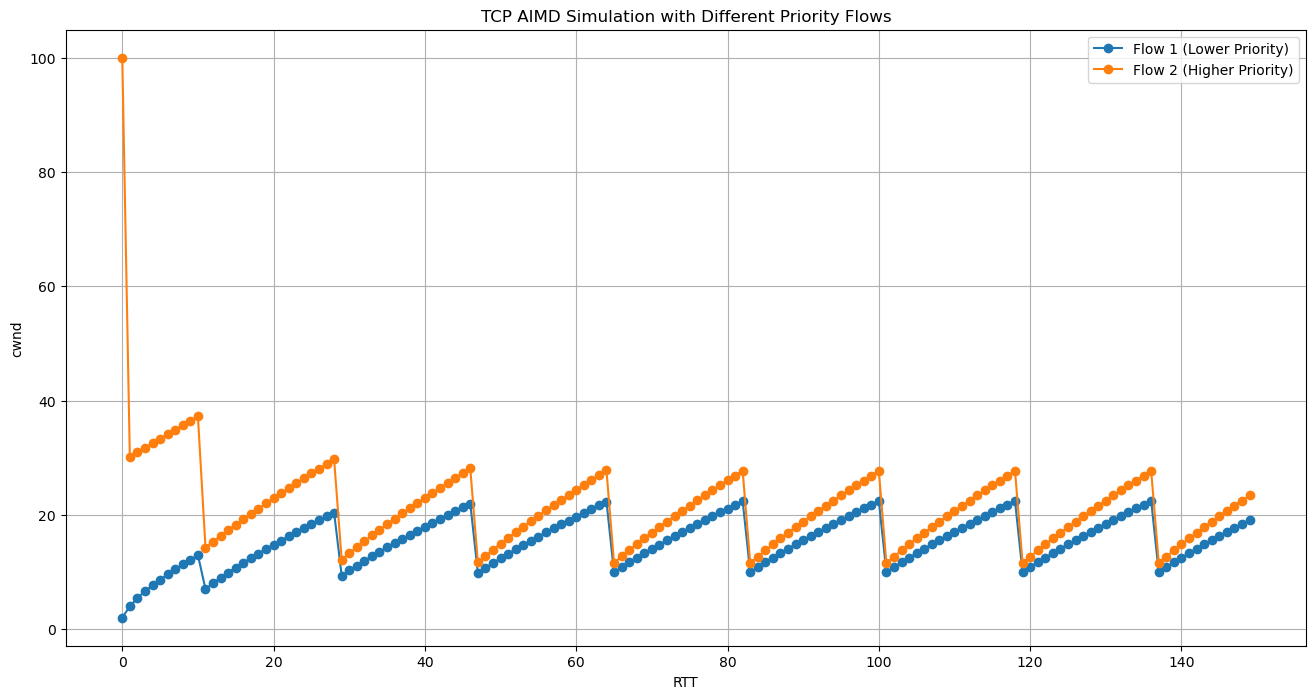

In [535]:
iterations = 150

aimd1 = 2 #lower
aimd2 = 100 #higher
capacity = 50

alpha = 2
beta = 0.5
count = 0

aimd1Vals, aimd2Vals = [], []

for i in range(iterations):
    aimd1Vals.append(aimd1)
    aimd2Vals.append(aimd2)
    #if congestion not detected
    if (aimd1 + aimd2 <= capacity):
        aimd1 = aimd1 + 2/((math.log(aimd1)))
        aimd2 = aimd2 + 4/((math.log(aimd2,2)))

    else:
        aimd1 = aimd1 * 2/math.log(aimd1,2)  # more decrease
        aimd2 = aimd2 * 2/math.log(aimd2,2) # lower decrease
        count += 1

print("no. of times overhead:", count)

plt.figure(figsize = (16, 8))
plt.plot(range(iterations), aimd1Vals, '-o', label = 'Flow 1 (Lower Priority)')
plt.plot(range(iterations), aimd2Vals, '-o', label = 'Flow 2 (Higher Priority)')

plt.xlabel('RTT')
plt.ylabel('cwnd')
plt.title('TCP AIMD Simulation with Different Priority Flows')
plt.grid(True)
plt.legend()
plt.show()

Flows with different RTT
- Flows with larger RTT should have more cwnd update to compensate

Peak aimd1: 10.0
Peak aimd2: 5.5
Number of times overhead: 168


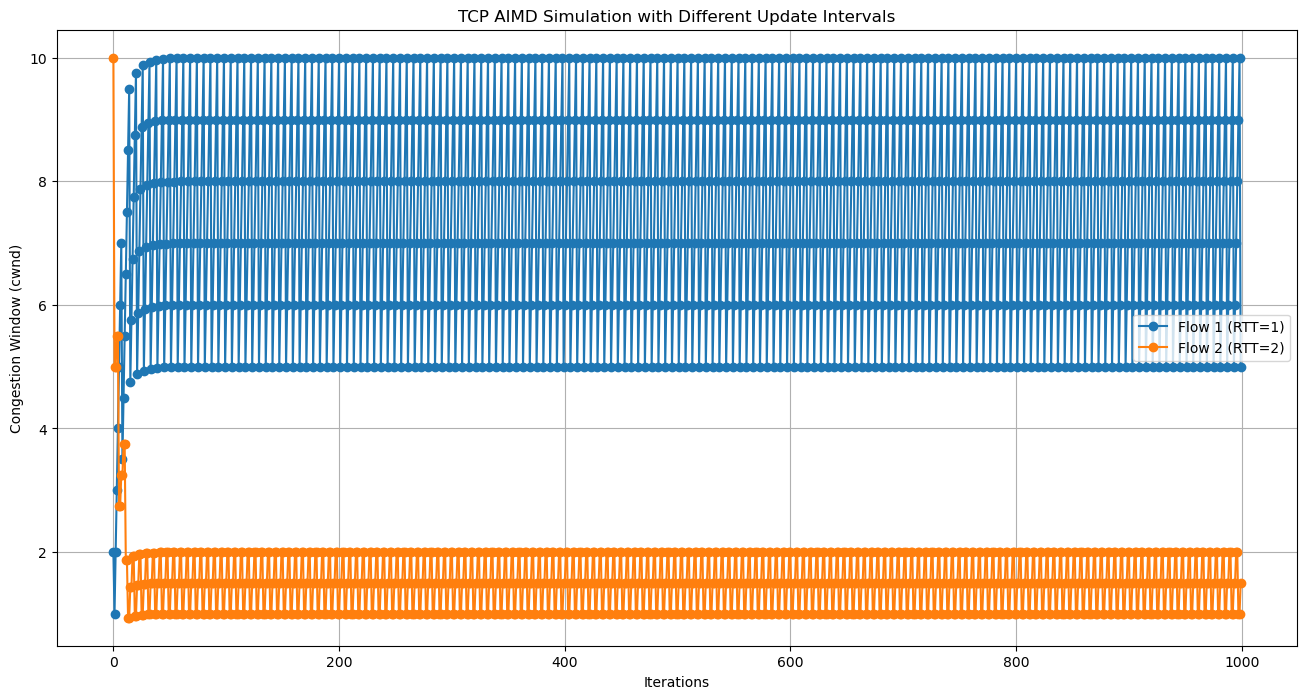

In [541]:
import matplotlib.pyplot as plt

iterations = 100
aimd1 = 2
aimd2 = 10
capacity = 10

alpha = 1
beta = 0.5
count = 0

peakaimd1 = 0
peakaimd2 = 0

aimd1Vals, aimd2Vals = [], []

# Define RTTs for the two flows
rtt1 = 1  
rtt2 = 2

for i in range(iterations):
    aimd1Vals.append(aimd1)
    aimd2Vals.append(aimd2)
    
    # Update congestion window for flow 1 (updates every iteration)
    if i % 1 == 0:
        if aimd1 + aimd2 <= capacity:
            aimd1 = aimd1 + alpha / rtt1
        else:
            aimd1 = aimd1 * beta
    
    # Update congestion window for flow 2 (updates every other iteration)
    if i % 2 == 0:
        if aimd1 + aimd2 <= capacity:
            aimd2 = aimd2 + alpha / rtt2
        else:
            aimd2 = aimd2 * beta
            count += 1

    # Update peak congestion window sizes
    peakaimd1 = max(peakaimd1, aimd1)
    peakaimd2 = max(peakaimd2, aimd2)

print("Peak aimd1:", peakaimd1)
print("Peak aimd2:", peakaimd2)
print("Number of times overhead:", count)

# Plot congestion window sizes over iterations
plt.figure(figsize=(16, 8))
plt.plot(range(iterations), aimd1Vals, '-o', label='Flow 1 (RTT=' + str(rtt1) + ')')
plt.plot(range(iterations), aimd2Vals, '-o', label='Flow 2 (RTT=' + str(rtt2) + ')')

plt.xlabel('Iterations')
plt.ylabel('Congestion Window (cwnd)')
plt.title('TCP AIMD Simulation with Different Update Intervals')
plt.grid(True)
plt.legend()
plt.show()
